In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 

In [3]:
mall=pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
set(mall['Genre'])

{'Female', 'Male'}

In [6]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
le=LabelEncoder()
mall['Genre']=le.fit_transform(mall['Genre'])

In [9]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


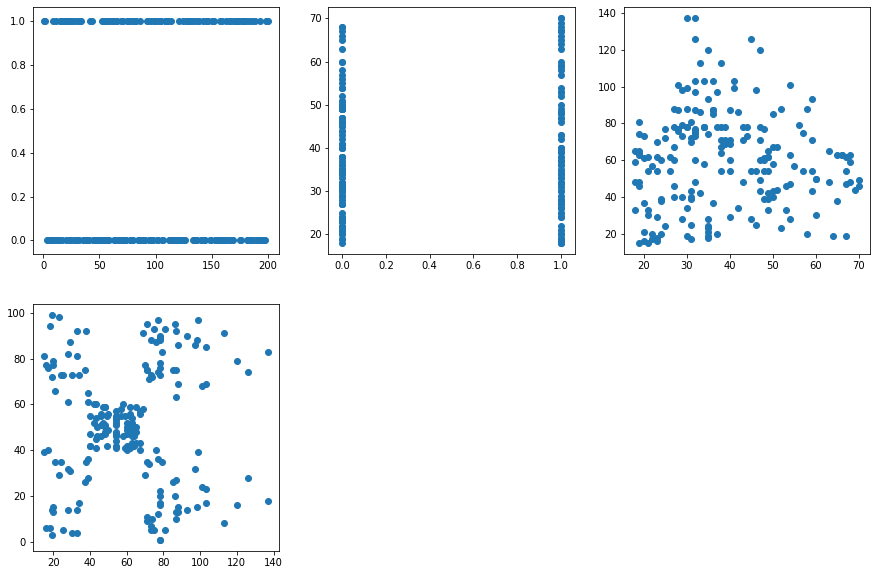

In [27]:
a=len(mall.columns)
b=1
plt.figure(figsize=(15,10))
for i in range(a-1):
    plt.subplot(2,3,b)
    plt.scatter(mall.iloc[:,i],mall.iloc[:,(i+1)])
    b+=1

In [28]:
x=mall.drop('CustomerID',axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc=StandardScaler()

In [31]:
x_sc=sc.fit_transform(x)

In [34]:
from sklearn.cluster import KMeans

In [78]:
mall_inertia=[]
k=list(range(1,7))
for i in k:
    km=KMeans(i).fit(x_sc)
    y_km=km.fit_predict(x_sc)
    mall_inertia.append(km.inertia_)
mall_inertia

[800.0,
 588.8026767824936,
 476.86006878694354,
 386.71478577406873,
 326.27675481370005,
 275.8588431130499]

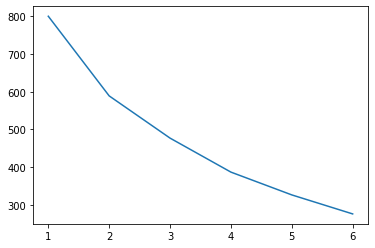

In [79]:
plt.plot(k,mall_inertia)

In [54]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_means=kmeans.fit_predict(x_sc)
y_means

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

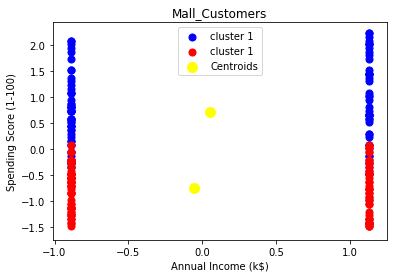

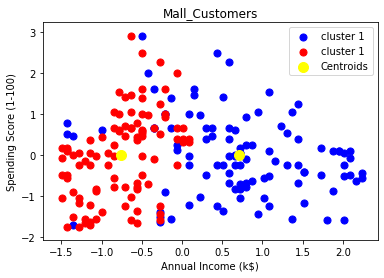

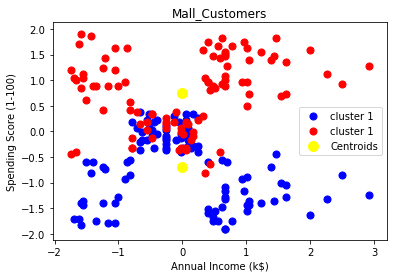

In [75]:


for j in range(0,3):
    plt.scatter(x_sc[y_means==0,j],x_sc[y_means==0,j+1],s=50,c='blue',label='cluster 1')
    plt.scatter(x_sc[y_means==1,j],x_sc[y_means==1,j+1],s=50,c='red',label='cluster 1')
    plt.scatter(kmeans.cluster_centers_[:,j],kmeans.cluster_centers_[:,j+1],s=100,c='yellow',label='Centroids')
    plt.title('Mall_Customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()
    
    